<font size=6><b>lec15. 시계열 ARIMA

* 원서 : https://otexts.com/fpp2/
* 번역 : https://otexts.com/fppkr/
* kaggle : https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

# 시계열 분석이란

## 1) 정의 
* 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 
* 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요

## 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동


## 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcPUgQm%2Fbtq5Fhh5em0%2FhaKQOzuv0kEE3eYfLNOpLK%2Fimg.jpg" width=400>


## 4) 정상성(Stationarity)
* 시간에 따른 평균&분산이 일정한 패턴


## <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src="https://velog.velcdn.com/images/leeebs/post/2328c13c-a990-4874-ba6a-14b24b2b8f6f/image.png" width=600>

# 시계열 모델

### AR(Autoregression) 자기상관 모델
* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>
* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$
*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값
*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>

### MA(Moving Average) 이동평균 모델
* <font color=red>이전 관측값의 예측 오차(e(t-1))를 이용하여 미래 값을 예측하는 모델</font>
* 데이터의 평균값이 시간에 따라 변화하는 추이 
* $Y_t = (e_{t-1} * w) + …  +c + (e_t)$
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>

### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
* <img src='https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27'>

## ARIMA
* ref : https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

# 최적의 p, q 찾기

<h3>ACF(Autocorrelation function) :자기상관함수 </h3>
<pre>
* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수
* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소
</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용

# 실습 : 날씨예측

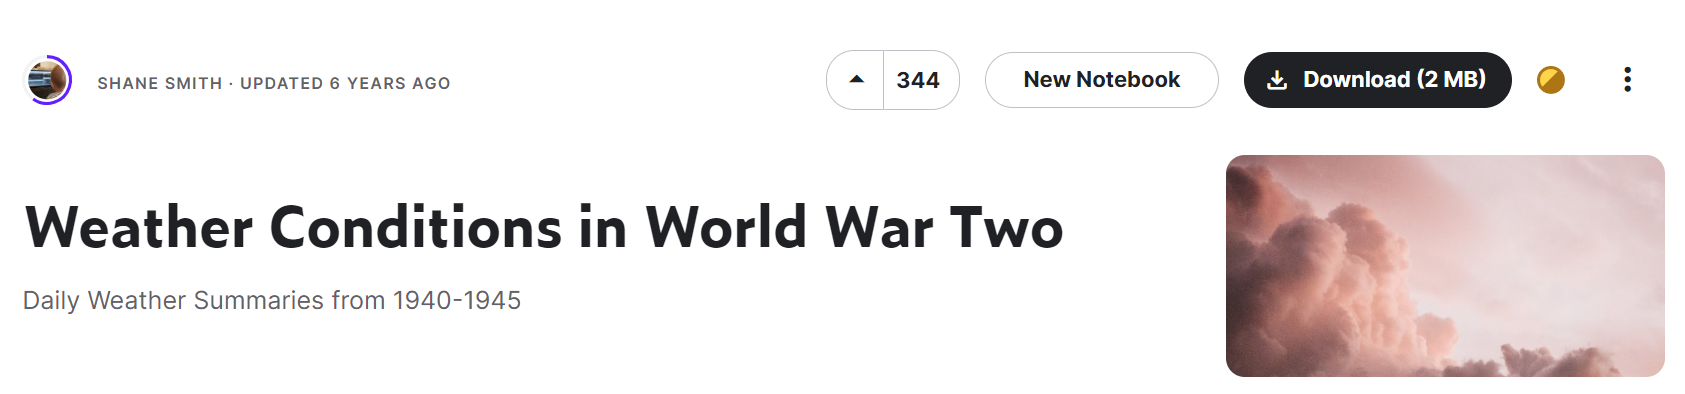
* ref : https://www.kaggle.com/datasets/smid80/weatherww2

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



## Data Load

* Date : rdate - 날짜타입변환
* MeanTemp :  temp - 연속형


In [3]:
df = pd.read_csv("lec15_SummaryofWeather.csv", parse_dates=['Date'])[['STA','Date','MeanTemp']]
df.columns = ['sta', 'rdate','temp']
df = df.set_index('rdate')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119040 entries, 1942-07-01 to 1945-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sta     119040 non-null  int64  
 1   temp    119040 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.7 MB


In [4]:
df = df[df['sta']==10001]
df.drop('sta', axis=1, inplace=True)
df.head(3)

,temp
rdate,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 1942-07-01 to 1945-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1157 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


## EDA

In [6]:
df.describe()

,temp
count,1157.000000
mean,26.514933
std,1.777196
min,20.555556
25%,25.000000
50%,26.666667
75%,27.777778
max,30.555556


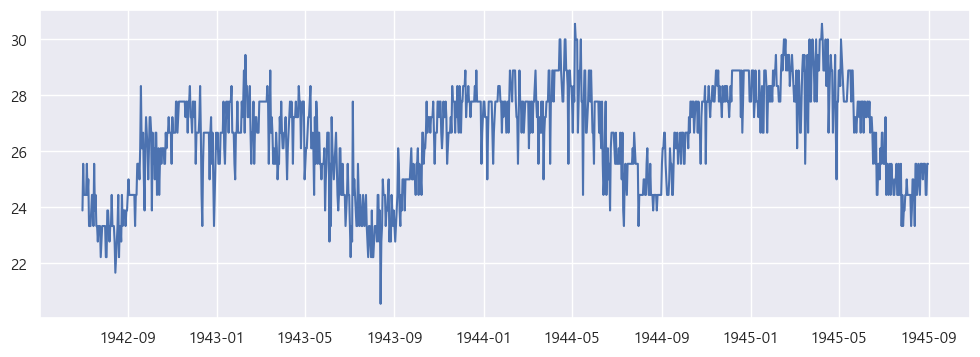

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df)
plt.show()

## 시계열 분해
* ref : https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

```python
statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
```


<Figure size 1200x400 with 0 Axes>

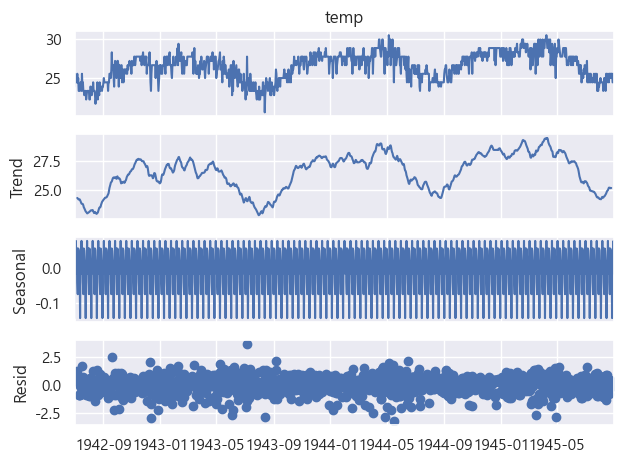

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['temp'], model='additive', period=12)
plt.figure(figsize=(12,4))
res.plot()
plt.show()


## 정상성 검정
* ref : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

* <b>Augmented Dickey-Fuller test</b>
    * 검정 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
    * <font color=red><b>귀무가설(H0): non-stationary.
    * <font color=red><b>대체가설 (H1): stationary.
    * <font color=red><b>AIC(Akaikie’s Information Criteria)</b></font>
        * $ AIC = −2ln(L) +2k​ $
        * 손실 가중치 계산 (낮을 수록 좋음)
        * <font color=red>AIC 값이 낮다는 것은 즉 모형의 적합도가 높은 것을 의미</font>
        * 모델 적합도 : 실제 자료와 연구자의 연구 모형이 얼마나 부합하는지 평가
        * 독립변수의 수가 증가할수록 2k를 증가시켜 패널티를 부여하여 모델의 품질을 평가        

```python
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
```

In [9]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df,  autolag='AIC')
res[1]   # 0.05보다 크다 : 귀무가설채택(비정상성 데이터이다)

0.13838534571230687

# 데이터 정상성 변환
* 분산 : 로그변환
* 평균 : 차분 (<font size=4 color=red><b>df.shift() : 1일차분  결측처리해야한다)

In [10]:
temp = df[:5]
temp

,temp
rdate,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [11]:
#    ↑    :   이후값으로 이전값 채우기
# temp = temp.shift(1)
# # temp.fillna(method='bfill', inplace=True)

#    ↓    : 이전값으로 이후값 채우기 
temp = temp.shift(-1)
temp.fillna(method='ffill', inplace=True)

temp

,temp
rdate,
1942-07-01,25.555556
1942-07-02,24.444444
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [12]:
df_diff = df - df.shift()
df_diff.fillna(method='bfill', inplace=True)
df_diff.head()

,temp
rdate,
1942-07-01,1.666667
1942-07-02,1.666667
1942-07-03,-1.111111
1942-07-04,0.000000
1942-07-05,0.000000


In [13]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df_diff,  autolag='AIC')
print( f"{res[1]:.30f}")   # 0.05보다 작다 : 귀무가설기각 대립가설채택(정상성 데이터이다)


0.000000000000000000000000018665


<Figure size 1200x400 with 0 Axes>

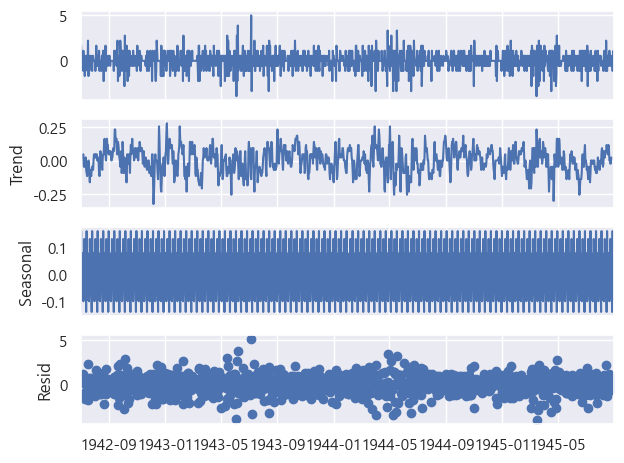

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_diff, model='additive', period=12)
plt.figure(figsize=(12,4))
res.plot()
plt.show()

# 모델 선택
* AR? vs. MA?
* ACF.PACF 사용 : 적정 p q d 찾기
* ACF : https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF : https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

```python
statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)

statsmodels.graphics.tsaplots.plot_pacf(x, ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)
```

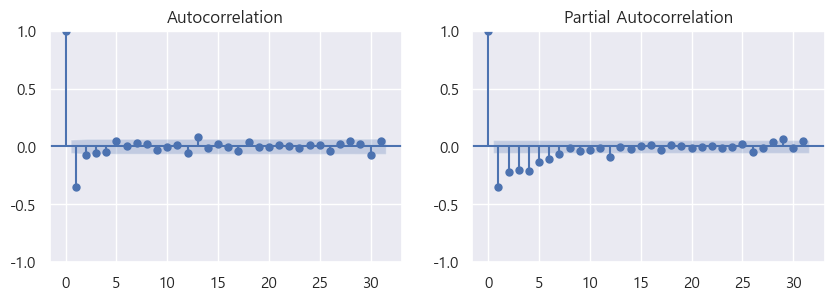

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
plot_acf(df_diff,   ax=ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(df_diff,   ax=ax2)

plt.show()


* <font color=red><b>AR : PACF </b></font>
* <font color=red><b>MA : ACF</b></font>
* x차분 했을때 그래프가 **급격히** 정상성의 범위로 들어오는지 확인
    * MA(1)
    * ARIMA (0 1 1) 

```python
class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
```


In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.01,  shuffle=False)
print(X_train.shape, X_test.shape)

(1145, 1) (12, 1)


In [29]:
model = ARIMA(X_train, order=(2, 1, 1))
fit_res = model.fit()
fit_res.summary()

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1145
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1440.096
Date:                Mon, 18 Sep 2023   AIC                           2888.192
Time:                        17:16:02   BIC                           2908.361
Sample:                             0   HQIC                          2895.808
                               - 1145                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2399      0.038      6.376      0.000       0.166       0.314
ar.L2         -0.0205      0.033     -0.612      0.540      -0.086       0.045
ma.L1         -0.8291      0.025    -32.799      0.000      -0.879      -0.780
sigma2         0.7255      0.022     33.046      0.000       0.682       0.768
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               245.76
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 예측
* predict : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html
* forecast : ARIMAResults.forecast(steps=1, signal_only=False, **kwargs)

``` python
ARIMAResults.predict(start=None, end=None, dynamic=False, information_set='predicted', signal_only=False, typ='linear')

    * 'linear' : Linear prediction in terms of the differenced endogenous variables.
    * 'levels' : Predict the levels of the original endogenous variables.)
```

In [30]:
pred = fit_res.forecast(steps=12)
# pred = fit_res.predict(1146, 1146+12, typ='levels')
pred

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1145    24.886100
1146    24.870136
1147    24.868636
1148    24.868602
1149    24.868625
1150    24.868631
1151    24.868632
1152    24.868632
1153    24.868632
1154    24.868632
1155    24.868632
1156    24.868632
Name: predicted_mean, dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error

print(f"RMSE : {np.sqrt( mean_squared_error(X_test, pred) ):.4f} ")       

RMSE : 0.5318 


In [20]:
X_test

,temp
rdate,
1945-08-20,24.444444
1945-08-21,25.555556
1945-08-22,25.555556
1945-08-23,25.555556
1945-08-24,25.000000
1945-08-25,25.555556
1945-08-26,25.555556
1945-08-27,25.555556
1945-08-28,24.444444


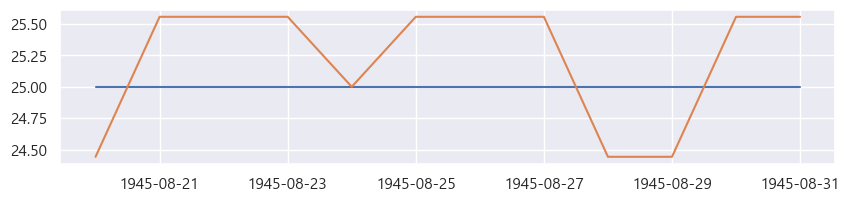

In [26]:
plt.figure(figsize=(10,2))
plt.plot(X_test.index, pred)
plt.plot(X_test.index , X_test)
plt.show()

In [27]:
! pip install yfinance

     ---------------------------------------- 65.3/65.3 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import yfinance as yf
df = yf.download('005930.KS',
                     start='2022-01-01',
                     end='2022-05-12') # 005930 : 삼성전자 주가

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,75986.734375,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,74731.562500,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,74248.804688,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,75600.539062,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,75310.875000,9947422
